<a href="https://colab.research.google.com/github/ha486-gk/DeepLearning/blob/main/25_12_25_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

인공지능 공부를 위한 colab 익히기 첫 단계

In [ ]:
import torch

# GPU 사용 가능한지 확인
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"현재 사용 중인 장치: {device}")

# 간단한 행렬 연산
x = torch.rand(5, 3).to(device)
print(x)

현재 사용 중인 장치: cuda
tensor([[0.4102, 0.9521, 0.0132],
        [0.2802, 0.6083, 0.2048],
        [0.3557, 0.5604, 0.8096],
        [0.1180, 0.6258, 0.0869],
        [0.5688, 0.8128, 0.6998]], device='cuda:0')


밑바닥부터 시작하는 딥러닝 코드 확인 - 1

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# 1. 간단한 신경망 모델 만들기 (책의 신경망 구조)
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        # 입력층(784) -> 은닉층(100) -> 출력층(10)
        self.fc1 = nn.Linear(784, 100)
        self.fc2 = nn.Linear(100, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x)) # 가중치 합 + ReLU 활성화 함수
        x = self.fc2(x)
        return x

# 2. 모델 인스턴스 생성 및 확인
model = SimpleNet().to(device) # 아까 설정한 GPU(device)로 모델 보냄
print(model)

SimpleNet(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)


Gemnini가 작성한 MNIST 학습 code


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# 1. 데이터 불러오기 (MNIST)
transform = transforms.Compose([transforms.ToTensor()])
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)

# 2. 모델 정의 (아까 만든 것과 비슷)
class MNISTNet(nn.Module):
    def __init__(self):
        super(MNISTNet, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 10)
    def forward(self, x):
        x = x.view(-1, 784) # 이미지를 1줄로 펴기
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = MNISTNet().to(device)
criterion = nn.CrossEntropyLoss() # 손실 함수
optimizer = optim.Adam(model.parameters(), lr=0.001) # 최적화 알고리즘

# 3. 학습 시작
model.train()
for epoch in range(5): # 우선 1회만 돌려봅시다
    for data, target in train_loader:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward() # 오차 역전파 (밑시딥의 핵심!)
        optimizer.step()
    print(f"Epoch 1 완성! 손실: {loss.item()}")

100%|██████████| 9.91M/9.91M [00:00<00:00, 59.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.82MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 15.1MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.52MB/s]


Epoch 1 완성! 손실: 0.14168310165405273
Epoch 1 완성! 손실: 0.05436941236257553
Epoch 1 완성! 손실: 0.06976571679115295
Epoch 1 완성! 손실: 0.08483825623989105
Epoch 1 완성! 손실: 0.03776150569319725


Gemnini가 작성한 MNIST 추론 code -pytorch ver

In [ ]:
# --- [새 셀: 추론하기] ---
model.eval() # "나 이제 시험 본다!"라고 선언

# 테스트용 데이터셋에서 무작위로 하나 뽑기
test_data = datasets.MNIST(root='./data', train=False, transform=transform)
img, label = test_data[100] # 100번째 데이터 시도

# AI에게 물어보기
with torch.no_grad():
    # 모델은 (배치사이즈, 채널, 가로, 세로) 형식을 원하므로 차원을 하나 추가(unsqueeze)
    output = model(img.to(device).unsqueeze(0))
    prediction = output.argmax(dim=1).item()

print(f"AI의 예측: {prediction}")
print(f"실제 정답: {label}")

AI의 예측: 6
실제 정답: 6


Gemini가 작성한 MNIST 학습 code - numpy ver

반복 0: Loss 2.2967
반복 200: Loss 2.1653
반복 400: Loss 1.2556
반복 600: Loss 0.8269
반복 800: Loss 0.7483
반복 1000: Loss 0.6666
반복 1200: Loss 0.3935
반복 1400: Loss 0.5605
반복 1600: Loss 0.4123
반복 1800: Loss 0.3243
반복 2000: Loss 0.3431
반복 2200: Loss 0.2260
반복 2400: Loss 0.2754
반복 2600: Loss 0.4376
반복 2800: Loss 0.3227
반복 3000: Loss 0.4114
반복 3200: Loss 0.3214
반복 3400: Loss 0.2501
반복 3600: Loss 0.1814
반복 3800: Loss 0.2145
반복 4000: Loss 0.1894
반복 4200: Loss 0.2739
반복 4400: Loss 0.2164
반복 4600: Loss 0.2457
반복 4800: Loss 0.2095
반복 5000: Loss 0.1752
반복 5200: Loss 0.2022
반복 5400: Loss 0.1394
반복 5600: Loss 0.2417
반복 5800: Loss 0.2565
반복 6000: Loss 0.2840
반복 6200: Loss 0.2472
반복 6400: Loss 0.2270
반복 6600: Loss 0.1919
반복 6800: Loss 0.2435
반복 7000: Loss 0.1513
반복 7200: Loss 0.1670
반복 7400: Loss 0.1950
반복 7600: Loss 0.1980
반복 7800: Loss 0.1617
반복 8000: Loss 0.2775
반복 8200: Loss 0.2386
반복 8400: Loss 0.1835
반복 8600: Loss 0.1878
반복 8800: Loss 0.1463
반복 9000: Loss 0.1926
반복 9200: Loss 0.2734
반복 9400: Loss 0.1366

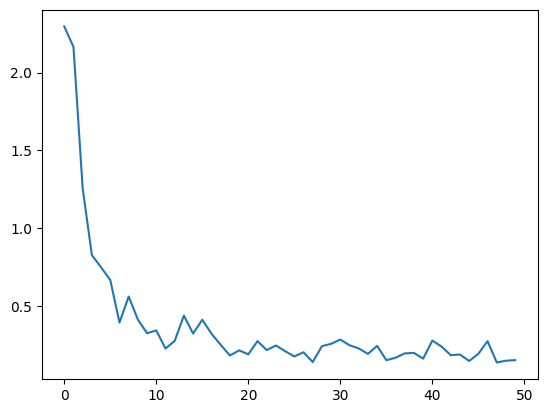

In [ ]:
# [Numpy 기반 모든 로직 통합 셀]
import numpy as np
import matplotlib.pyplot as plt

# 1. 필수 함수들 정의
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    x = x - np.max(x, axis=-1, keepdims=True)
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    if t.size == y.size:
        t = t.argmax(axis=1)
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

# 2. 신경망 클래스
class TwoLayerNetIntegrated:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        return softmax(a2)

    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        batch_num = x.shape[0]
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid(a1) * (1 - sigmoid(a1)) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)
        return grads

# 3. 모델 생성 및 학습
net = TwoLayerNetIntegrated(input_size=784, hidden_size=50, output_size=10)
iters_num = 10000
batch_size = 100
learning_rate = 0.1
loss_history = []

for i in range(iters_num):
    batch_mask = np.random.choice(60000, batch_size)
    x_batch = train_data.data[batch_mask].reshape(-1, 784).numpy() / 255.0
    y_labels = train_data.targets[batch_mask].numpy()
    t_batch = np.zeros((batch_size, 10))
    for idx, val in enumerate(y_labels): t_batch[idx, val] = 1

    grad = net.gradient(x_batch, t_batch)
    for key in ('W1', 'b1', 'W2', 'b2'):
        net.params[key] -= learning_rate * grad[key]

    if i % 200 == 0:
        loss = cross_entropy_error(net.predict(x_batch), t_batch)
        loss_history.append(loss)
        print(f"반복 {i}: Loss {loss:.4f}")

plt.plot(loss_history)
plt.show()

Gemini가 작성한 MNIST 추론 code - numpy ver

In [ ]:
# --- [추론 코드 추가] ---

# 1. 테스트 데이터에서 무작위로 하나 뽑기
test_idx = np.random.choice(10000, 1) # 테스트 데이터는 총 1만개입니다.
test_img = test_data.data[test_idx].reshape(1, 784).numpy() / 255.0
test_label = test_data.targets[test_idx].numpy()[0]

# 2. 모델에 넣어서 예측하기
predict_result = net.predict(test_img) # softmax 결과 (10개 숫자에 대한 확률)
predicted_number = np.argmax(predict_result) # 가장 높은 확률의 인덱스

print(f"실제 정답: {test_label}")
print(f"AI의 예측: {predicted_number}")
print(f"각 숫자일 확률: {np.round(predict_result, 3)}") # 확률 분포 확인

실제 정답: 6
AI의 예측: 6
각 숫자일 확률: [[0.002 0.    0.001 0.    0.001 0.008 0.986 0.    0.001 0.   ]]


Gemini가 작성한 MNIST 가중치 저장 code - pytorch ver.

In [ ]:
import torch
from google.colab import drive
drive.mount('/content/drive') # 드라이브 연결

# 가중치 저장 (경로를 본인 드라이브로 지정)
torch.save(model.state_dict(), '/content/drive/MyDrive/my_pytorch_mnist.pth')
print("파이토치 가중치 저장 완료!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
파이토치 가중치 저장 완료!


Gemini가 작성한 MNIST 가중치 저장 code - numpy ver.

In [ ]:
import pickle
# net.params 딕셔너리를 저장합니다.
with open('/content/drive/MyDrive/my_numpy_mnist.pkl', 'wb') as f:
    pickle.dump(net.params, f)
print("넘파이 가중치 저장 완료!")

넘파이 가중치 저장 완료!
